In [1]:
# import lib
import pandas as pd 
import numpy as np

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')


In [4]:
dataset= pd.read_csv("spam1.csv", encoding = 'latin-1')

# Drop the extra columns and rename columns

dataset = dataset.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
dataset.columns = ["label", "text"]

In [5]:
dataset.head(10)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
dataset.isnull().sum()

label    0
text     0
dtype: int64

In [8]:
dataset.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
#encoding the spam and ham as 0 and 1

In [10]:
dataset['label'] = dataset['label'].map({'ham' : 0, 'spam': 1})

In [11]:
dataset.head(5)

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
dataset

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [13]:
dataset.isnull().sum()

label    0
text     0
dtype: int64

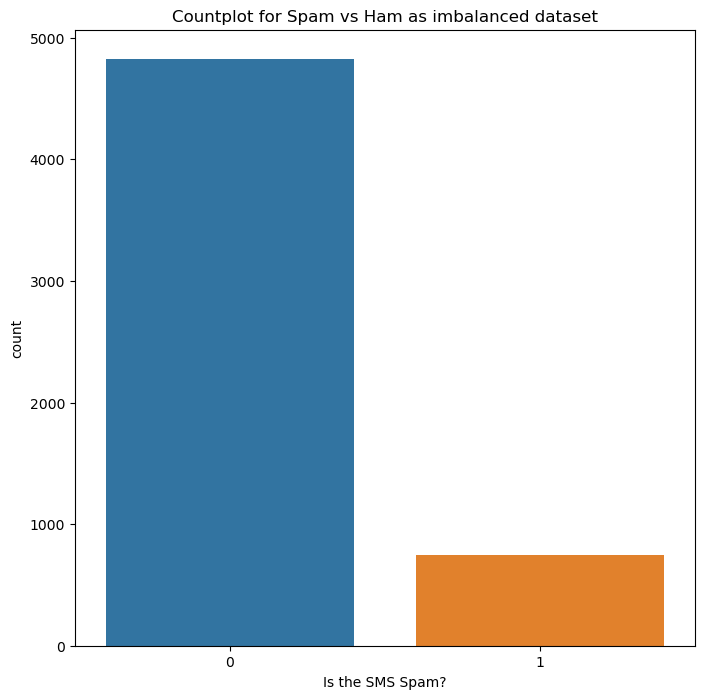

In [14]:
plt.figure(figsize=(8,8))
p = sns.countplot(x="label" , data=dataset)
p = plt.title('Countplot for Spam vs Ham as imbalanced dataset')
p = plt.xlabel('Is the SMS Spam?')
p = plt.ylabel('count')

In [15]:
dataset.describe()

,label
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [16]:
only_spam = dataset[dataset["label"] == 1]
only_spam

,label,text
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [17]:
dataset.shape

(5572, 2)

In [18]:
count = int((dataset.shape[0] - only_spam.shape[0]) / only_spam.shape[0])

In [19]:
count

6

In [20]:
for i in range(0, count-1):
    dataset = pd.concat([dataset,only_spam])

In [21]:
dataset

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [22]:
dataset.reset_index()

,index,label,text
0,0,0,"Go until jurong point, crazy.. Available only ..."
1,1,0,Ok lar... Joking wif u oni...
2,2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,3,0,U dun say so early hor... U c already then say...
4,4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...,...
9302,5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
9303,5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
9304,5547,1,Had your contract mobile 11 Mnths? Latest Moto...
9305,5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


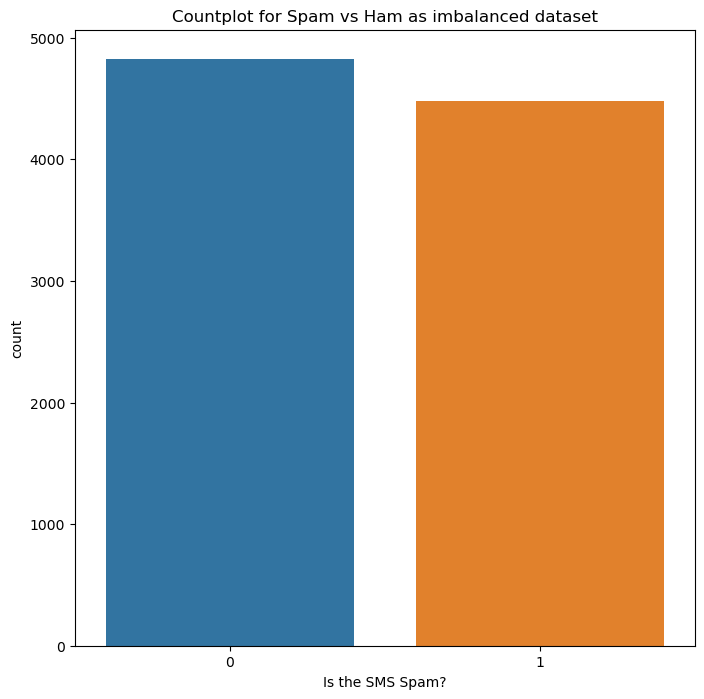

In [23]:
plt.figure(figsize=(8,8))
p = sns.countplot(x="label" , data=dataset)
p = plt.title('Countplot for Spam vs Ham as imbalanced dataset')
p = plt.xlabel('Is the SMS Spam?')
p = plt.ylabel('count')

In [24]:
dataset.head(5)

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [25]:
dataset['word_count'] = dataset['text'].apply(lambda x: len(x.split()))

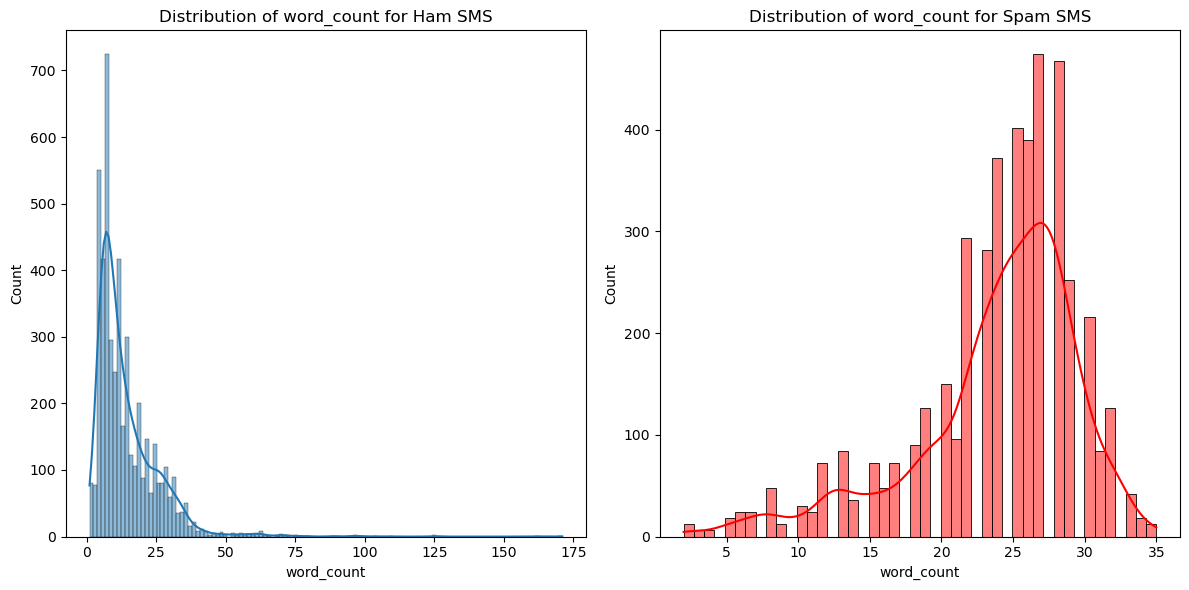

In [26]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
g = sns.histplot(dataset[dataset["label"] == 0].word_count, kde = True ,)
p = plt.title('Distribution of word_count for Ham SMS')

plt.subplot(1,2,2)
g = sns.histplot(dataset[dataset["label"] == 1].word_count, kde = True , color='red')
p = plt.title('Distribution of word_count for Spam SMS')

plt.tight_layout()
plt.show()

In [27]:
dataset.rename(columns={'text' : 'message'} , inplace=True)

In [28]:
dataset

,label,message,word_count
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


In [29]:
def currency(data):
    currency_symbols = ['€','$','¥','£','₹']
    for i in currency_symbols:
        return 1
    return 0

In [30]:
dataset["contains_currency_symbol"] = dataset["message"].apply(currency)

In [31]:
dataset

,label,message,word_count,contains_currency_symbol
0,0,"Go until jurong point, crazy.. Available only ...",20,1
1,0,Ok lar... Joking wif u oni...,6,1
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,1
3,0,U dun say so early hor... U c already then say...,11,1
4,0,"Nah I don't think he goes to usf, he lives aro...",13,1
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,1


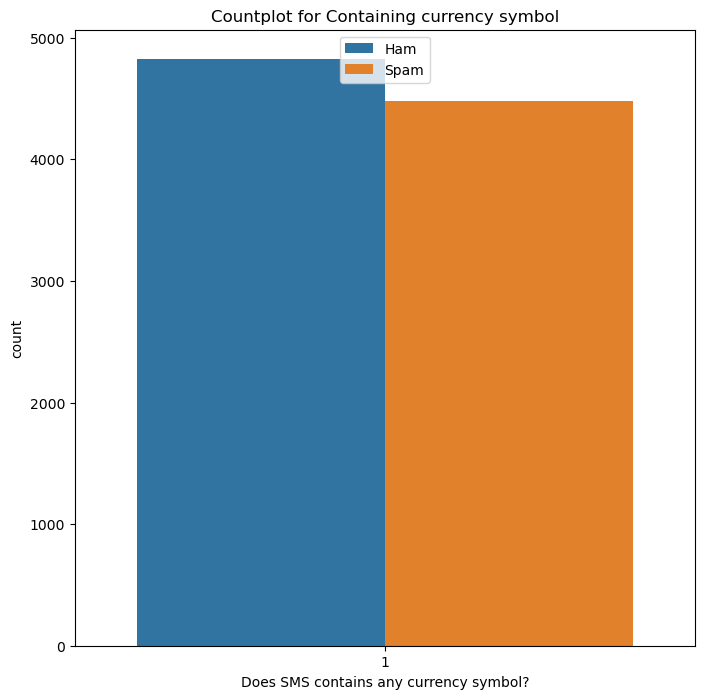

In [32]:
plt.figure(figsize=(8,8))
p = sns.countplot(x="contains_currency_symbol", data=dataset, hue= "label")
p = plt.title('Countplot for Containing currency symbol')
p = plt.xlabel('Does SMS contains any currency symbol?')
p = plt.ylabel('count')
p = plt.legend(labels=["Ham" , "Spam"], loc = 9)

In [33]:
def number(data):
    for i in data:
        if ord(i) >=48 and ord(i) <=57:
            return 1
    return 0

In [34]:
dataset["contains_number"] = dataset["message"].apply(number)

In [35]:
dataset

,label,message,word_count,contains_currency_symbol,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,1,0
1,0,Ok lar... Joking wif u oni...,6,1,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,1,1
3,0,U dun say so early hor... U c already then say...,11,1,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,1,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,1,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,1,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,1,1


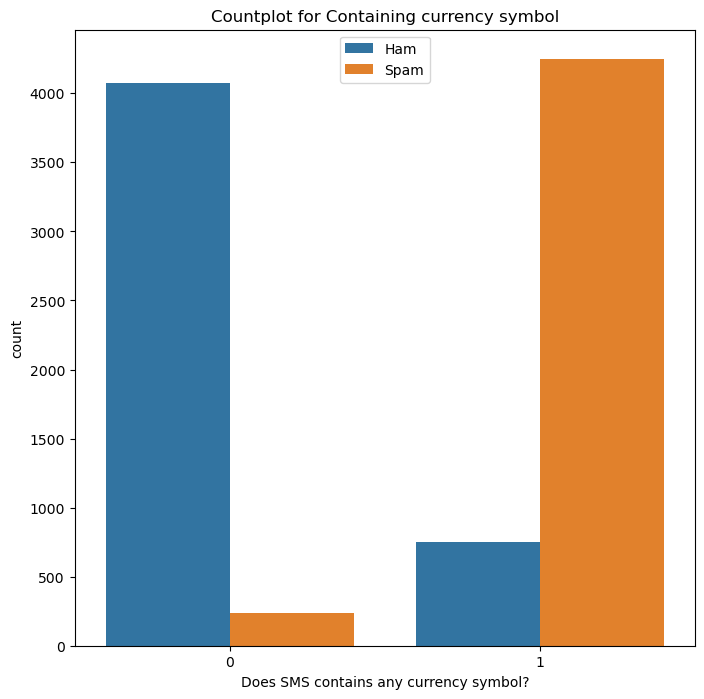

In [36]:
plt.figure(figsize=(8,8))
p = sns.countplot(x="contains_number", data=dataset, hue="label")
p = plt.title('Countplot for Containing currency symbol')
p = plt.xlabel('Does SMS contains any currency symbol?')
p = plt.ylabel('count')
p = plt.legend(labels=["Ham" , "Spam"], loc = 9)

In [37]:
#data cleaning
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [38]:
from nltk.corpus import wordnet as wn

In [41]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...


True

In [42]:
corpus=[]
wn1 = WordNetLemmatizer()

for sms in list(dataset['message']):
    message = re.sub(pattern='[^a-zA-Z]', repl= ' ', string=sms) #filtering oy special character and number
    message = message.lower()
    words = message.split() 
    filtered_words = [word for word in words if word not in set (stopwords.words('english'))]
    lemm_words = [wn1.lemmatize(word) for word in filtered_words]
    message = ''.join(lemm_words)
    
    corpus.append(message)

In [ ]:
dataset

In [ ]:
corpus

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names()

In [44]:
x = pd.DataFrame(vectors, columns = feature_names)
y = dataset['label']

In [45]:
x 

,askedmobilechatlinesinclufreeminindiacustservssedyeslergotmegabilldontgivshitbailiffduedaywant,auctionroundhighestbidnextmaximumbidbidsendbidegbidgoodluck,awardedsipixdigitalcameracalllandlinedeliverywithindaycboxbpyrwarrantyppmpp,backworkmorrohalftermucnitesexypassionbgobackchatluvdenacallminmobsmorelkpoboxhpfl,bangbabesurorderwayureceiveservicemsgdownloadurcontentugotowapbangbtvurmobileinternetservicemenu,bankgraniteissuestrongbuyexplosivepickmembernasdaqsymbolcdgtper,bearpicnicktompetedickfacttypetrygaychatphotouploadcallpminstoptextcall,believetrueincredibletxtsreplyglearntrulyamazingthingblowmindfwdptxt,bfloppybsnappyhappygaychatservicephotouploadcallpminstoptextcall,bigbrotheralertcomputerselectedukcashvouchercallnttpoboxcrobtlandlinecostppmmobilevary,...,winneruspeciallyselectedreceiveholidayflightincspeakliveoperatorclaimpmin,winnervaluednetworkcustomerselectedreceiveaprizerewardclaimcallclaimcodeklvalidhour,winnewestharrypotterorderphoenixbookreplyharryanswerquestionchancefirstamongreader,winwinnermrfoleyipodexcitingprizesoonkeepeyeurmobilevisitwwwwincouk,winyearsupplycdstoreurchoiceworthenterweeklydrawtxtmusictcwwwldewcomsubwinppmx,wouldlikeseexxxpichotnearlybanneduk,wowboyrbacktakeuktourwinvipticketprebookvipclubtxtclubtrackmarqueltdinfovipclubu,xmasrewardwaitingcomputerrandomlypickedloyalmobilecustomerreceiverewardcall,xxxmobilemovieclubusecreditclickwaplinknexttxtmessageclickhttpwapxxxmobilemovieclubcomnqjkgighjjgcbl,yesplacetownmeetexcitingadultsingleuktxtchatpmsg
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9302,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9303,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9304,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9305,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5537    1
5540    1
5547    1
5566    1
5567    1
Name: label, Length: 9307, dtype: int64

In [47]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [52]:
x_train, x_test, y_train, y_test = train_test_split(x ,y, test_size=0.2, random_state=42)

In [53]:
x_train

,askedmobilechatlinesinclufreeminindiacustservssedyeslergotmegabilldontgivshitbailiffduedaywant,auctionroundhighestbidnextmaximumbidbidsendbidegbidgoodluck,awardedsipixdigitalcameracalllandlinedeliverywithindaycboxbpyrwarrantyppmpp,backworkmorrohalftermucnitesexypassionbgobackchatluvdenacallminmobsmorelkpoboxhpfl,bangbabesurorderwayureceiveservicemsgdownloadurcontentugotowapbangbtvurmobileinternetservicemenu,bankgraniteissuestrongbuyexplosivepickmembernasdaqsymbolcdgtper,bearpicnicktompetedickfacttypetrygaychatphotouploadcallpminstoptextcall,believetrueincredibletxtsreplyglearntrulyamazingthingblowmindfwdptxt,bfloppybsnappyhappygaychatservicephotouploadcallpminstoptextcall,bigbrotheralertcomputerselectedukcashvouchercallnttpoboxcrobtlandlinecostppmmobilevary,...,winneruspeciallyselectedreceiveholidayflightincspeakliveoperatorclaimpmin,winnervaluednetworkcustomerselectedreceiveaprizerewardclaimcallclaimcodeklvalidhour,winnewestharrypotterorderphoenixbookreplyharryanswerquestionchancefirstamongreader,winwinnermrfoleyipodexcitingprizesoonkeepeyeurmobilevisitwwwwincouk,winyearsupplycdstoreurchoiceworthenterweeklydrawtxtmusictcwwwldewcomsubwinppmx,wouldlikeseexxxpichotnearlybanneduk,wowboyrbacktakeuktourwinvipticketprebookvipclubtxtclubtrackmarqueltdinfovipclubu,xmasrewardwaitingcomputerrandomlypickedloyalmobilecustomerreceiverewardcall,xxxmobilemovieclubusecreditclickwaplinknexttxtmessageclickhttpwapxxxmobilemovieclubcomnqjkgighjjgcbl,yesplacetownmeetexcitingadultsingleuktxtchatpmsg
3533,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4253,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6976,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
# first model

In [56]:
#naive bayes model
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
cv = cross_val_score(mnb,x,y, scoring='f1',cv=10)
print(round(cv.mean(),3))
print(round(cv.std(),3))

0.569
0.007


In [58]:
mnb.fit(x_train, y_train)
y_pred = mnb.predict(x_test)

In [59]:
y_pred

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [60]:
y_test

1155    0
1790    0
3003    1
1121    1
592     1
       ..
4147    1
274     0
1345    0
2366    1
4031    0
Name: label, Length: 1862, dtype: int64

In [62]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77       958
           1       1.00      0.38      0.55       904

    accuracy                           0.70      1862
   macro avg       0.82      0.69      0.66      1862
weighted avg       0.81      0.70      0.67      1862



In [63]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[958,   0],
       [561, 343]], dtype=int64)

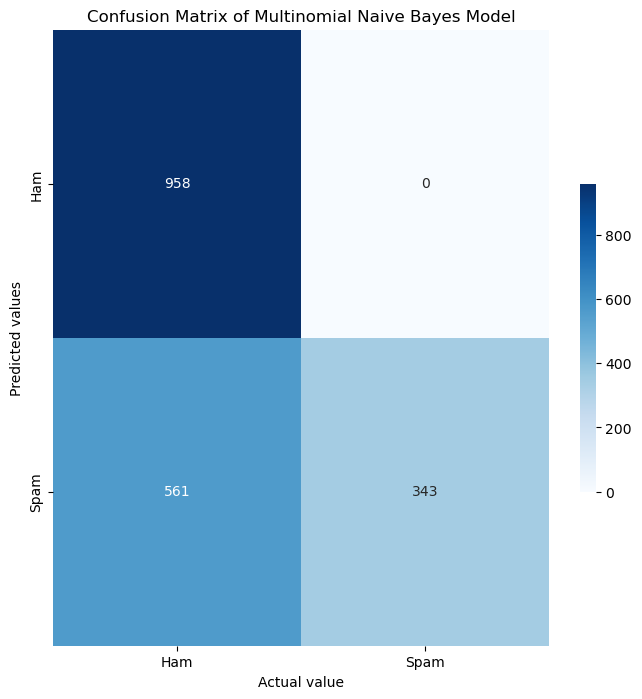

In [67]:
plt.figure(figsize=(8,8))
axis_labels = ['Ham','Spam']
g = sns.heatmap(data=cm, xticklabels=axis_labels, yticklabels=axis_labels, annot = True, fmt='g',cbar_kws={"shrink": 0.5}, cmap="Blues")
p = plt.title("Confusion Matrix of Multinomial Naive Bayes Model")
p = plt.xlabel('Actual value')
p = plt.ylabel("Predicted values")


In [69]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
cv1 = cross_val_score(dt, x, y, scoring='f1', cv=10)
print(round(cv1.mean(),3))
print(round(cv1.std(),3))

0.942
0.005


In [72]:
dt.fit(x_train, y_train)
y_pred1 = dt.predict(x_test)

In [75]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95       958
           1       1.00      0.89      0.94       904

    accuracy                           0.94      1862
   macro avg       0.95      0.94      0.94      1862
weighted avg       0.95      0.94      0.94      1862



In [76]:
cm = confusion_matrix(y_test, y_pred1)
cm 

array([[958,   0],
       [103, 801]], dtype=int64)

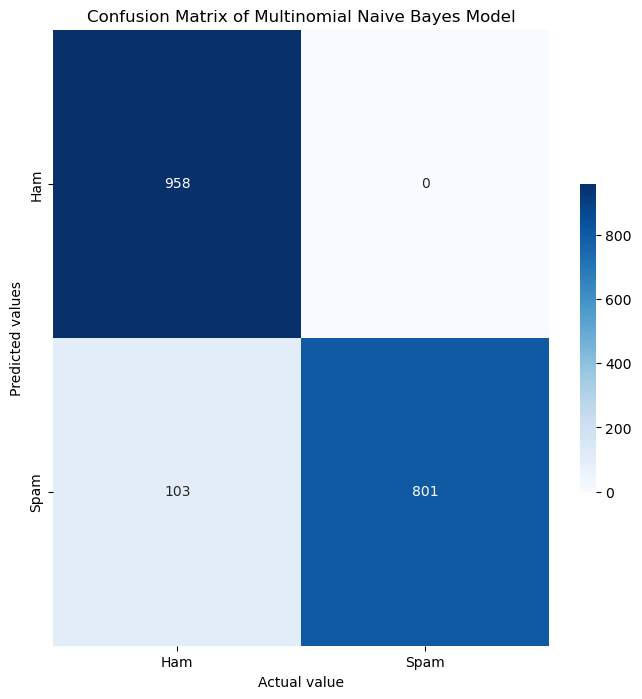

In [78]:
plt.figure(figsize=(8,8))
axis_labels = ['Ham','Spam']
g = sns.heatmap(data=cm, xticklabels=axis_labels, yticklabels=axis_labels, annot = True, fmt='g',cbar_kws={"shrink": 0.5}, cmap="Blues")
p = plt.title("Confusion Matrix of Multinomial Naive Bayes Model")
p = plt.xlabel('Actual value')
p = plt.ylabel("Predicted values")

In [86]:
def predict_spam(sms):
    message = re.sub(pattern='[^a-zA-Z]', repl= '',string=sms) #filtering out special characters and numbers
    message = message.lower()
    word =  message.split() #tokenizer
    filtered_words = [word for word in word if word not in set (stopwords.words('english'))]
    lem_words = [wn1.lemmatize(word) for word in filtered_words]
    message = ' '.join(lem_words)
    temp = tfidf.transform([message]).toarray()
    return dt.predict(temp)

In [87]:
# Prediction 1 
sample_message = 'Import You could be entitled up to E3,  a credit 160 in composition from mis-sold-PPI on credit card '

if predict_spam(sample_message):
    print("This is spam message.")
else:
    print("This is not a spam message.")

This is not a spam message.
